# **PROYECTO FINAL CREDIT CARD FRAUD DETECTION** 

**INTRODUCCION**

El aumento del uso de tarjetas de crédito ha llevado a un incremento en los intentos de fraude, lo que representa una amenaza para la seguridad financiera de los usuarios y las instituciones bancarias. Las entidades financieras enfrentan pérdidas económicas considerables debido a transacciones fraudulentas no detectadas, lo que también puede dañar su reputación y disminuir la confianza de los clientes.

Impacto

- Pérdidas económicas considerables para la institucion financiera
- Daño a la reputación y disminución de la confianza de los clientes
- Pérdidas globales por fraude con tarjetas de pago: 28 mil millones de dólares en 2019

Necesidad de soluciones

- Desarrollo de sistemas automatizados basados en Machine Learning para detectar patrones sospechosos en tiempo real
- Protección de clientes y instituciones financieras
- Mejora de la eficiencia y reducción de errores en la detección de fraudes

**Objetivo del Proyecto**

- Desarrollo del modelo

El objetivo principal es crear un modelo de Machine Learning capaz de predecir si una transacción de tarjeta de crédito es fraudulenta o legítima, utilizando datos históricos de transacciones.

- Aplicación práctica

Este modelo puede integrarse en sistemas de procesamiento de pagos para monitorear y filtrar transacciones en tiempo real, permitiendo una intervención rápida ante actividades sospechosas

**Tipo de Problema**

- Clasificación binaria

El problema se enmarca en una clasificación binaria, donde el modelo debe asignar una de dos clases a cada transacción:

0: Transacción legítima

1: Transacción fraudulenta

- Desbalance de clases

El conjunto de datos presenta un desbalance significativo entre las clases, con solo un pequeño porcentaje de transacciones fraudulentas. Este desbalance puede afectar negativamente el rendimiento del modelo, ya que puede llevarlo a predecir mayoritariamente la clase dominante (transacciones legítimas)

**Justificación del Proyecto**

- Automatización de procesos, implementar un sistema automatizado de detección de fraudes reduce la necesidad de revisiones manuales, lo que ahorra tiempo y recursos.

- Reducción de riesgos financieros, detectar fraudes de manera temprana minimiza las pérdidas económicas y mejora la confianza de los clientes.

- Mejora de la seguridad, un sistema eficaz protege tanto a las instituciones financieras como a los usuarios, evitando el uso indebido de datos sensibles.

- Aplicación en el mundo real, este tipo de modelos ya se utilizan en la industria financiera para prevenir fraudes en tiempo real, como se puede observar en estudios previos

# Importar librerias

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Carga la base de datos

El conjunto de datos utilizado fue extraído del repositorio de Kaggle, bajo el nombre: "Credit Card Fraud Detection"

Este dataset contiene transacciones de tarjetas de crédito realizadas en septiembre de 2013 por titulares de tarjetas en Europa. Las variables de entrada han sido transformadas con un algoritmo de reducción de dimensionalidad (PCA) por razones de privacidad.

In [101]:
# Cargar datos desde un archivo CSV
ruta_archivo = r'C:\Users\gyrda\OneDrive\Escritorio\Proyecto final\proyecto-final-brayan-vera\creditcard.csv'
df = pd.read_csv(ruta_archivo)

In [102]:
# Ver las primeras filas del DataFrame
# V1 a V28 = variables transformadas por PCA que resumen la información original,
# pero no tienen un significado directo en términos humanos (no son nombres de atributos originales).
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [103]:
# Ver forma del DataFrame
print(f"Número de filas: {df.shape[0]}")
print(f"Número de columnas: {df.shape[1]}")

Número de filas: 284807
Número de columnas: 31


# Análisis descriptivo de los datos

Objetivo:

Conocer las propiedades estadísticas básicas de las variables predictoras, identificar distribuciones y posibles anomalías. Este paso dará una intuición sobre cómo se comportan los datos y cómo podrían influir en la predicción de fraudes.

In [104]:
# Estadísticas básicas de todas las variables
desc = df.describe()
print(desc)

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

Distribución de las variables predictoras

Como las variables V1 a V28 provienen de una transformación PCA, sus distribuciones tienden a parecerse a una distribución normal (aunque no lo son estrictamente).

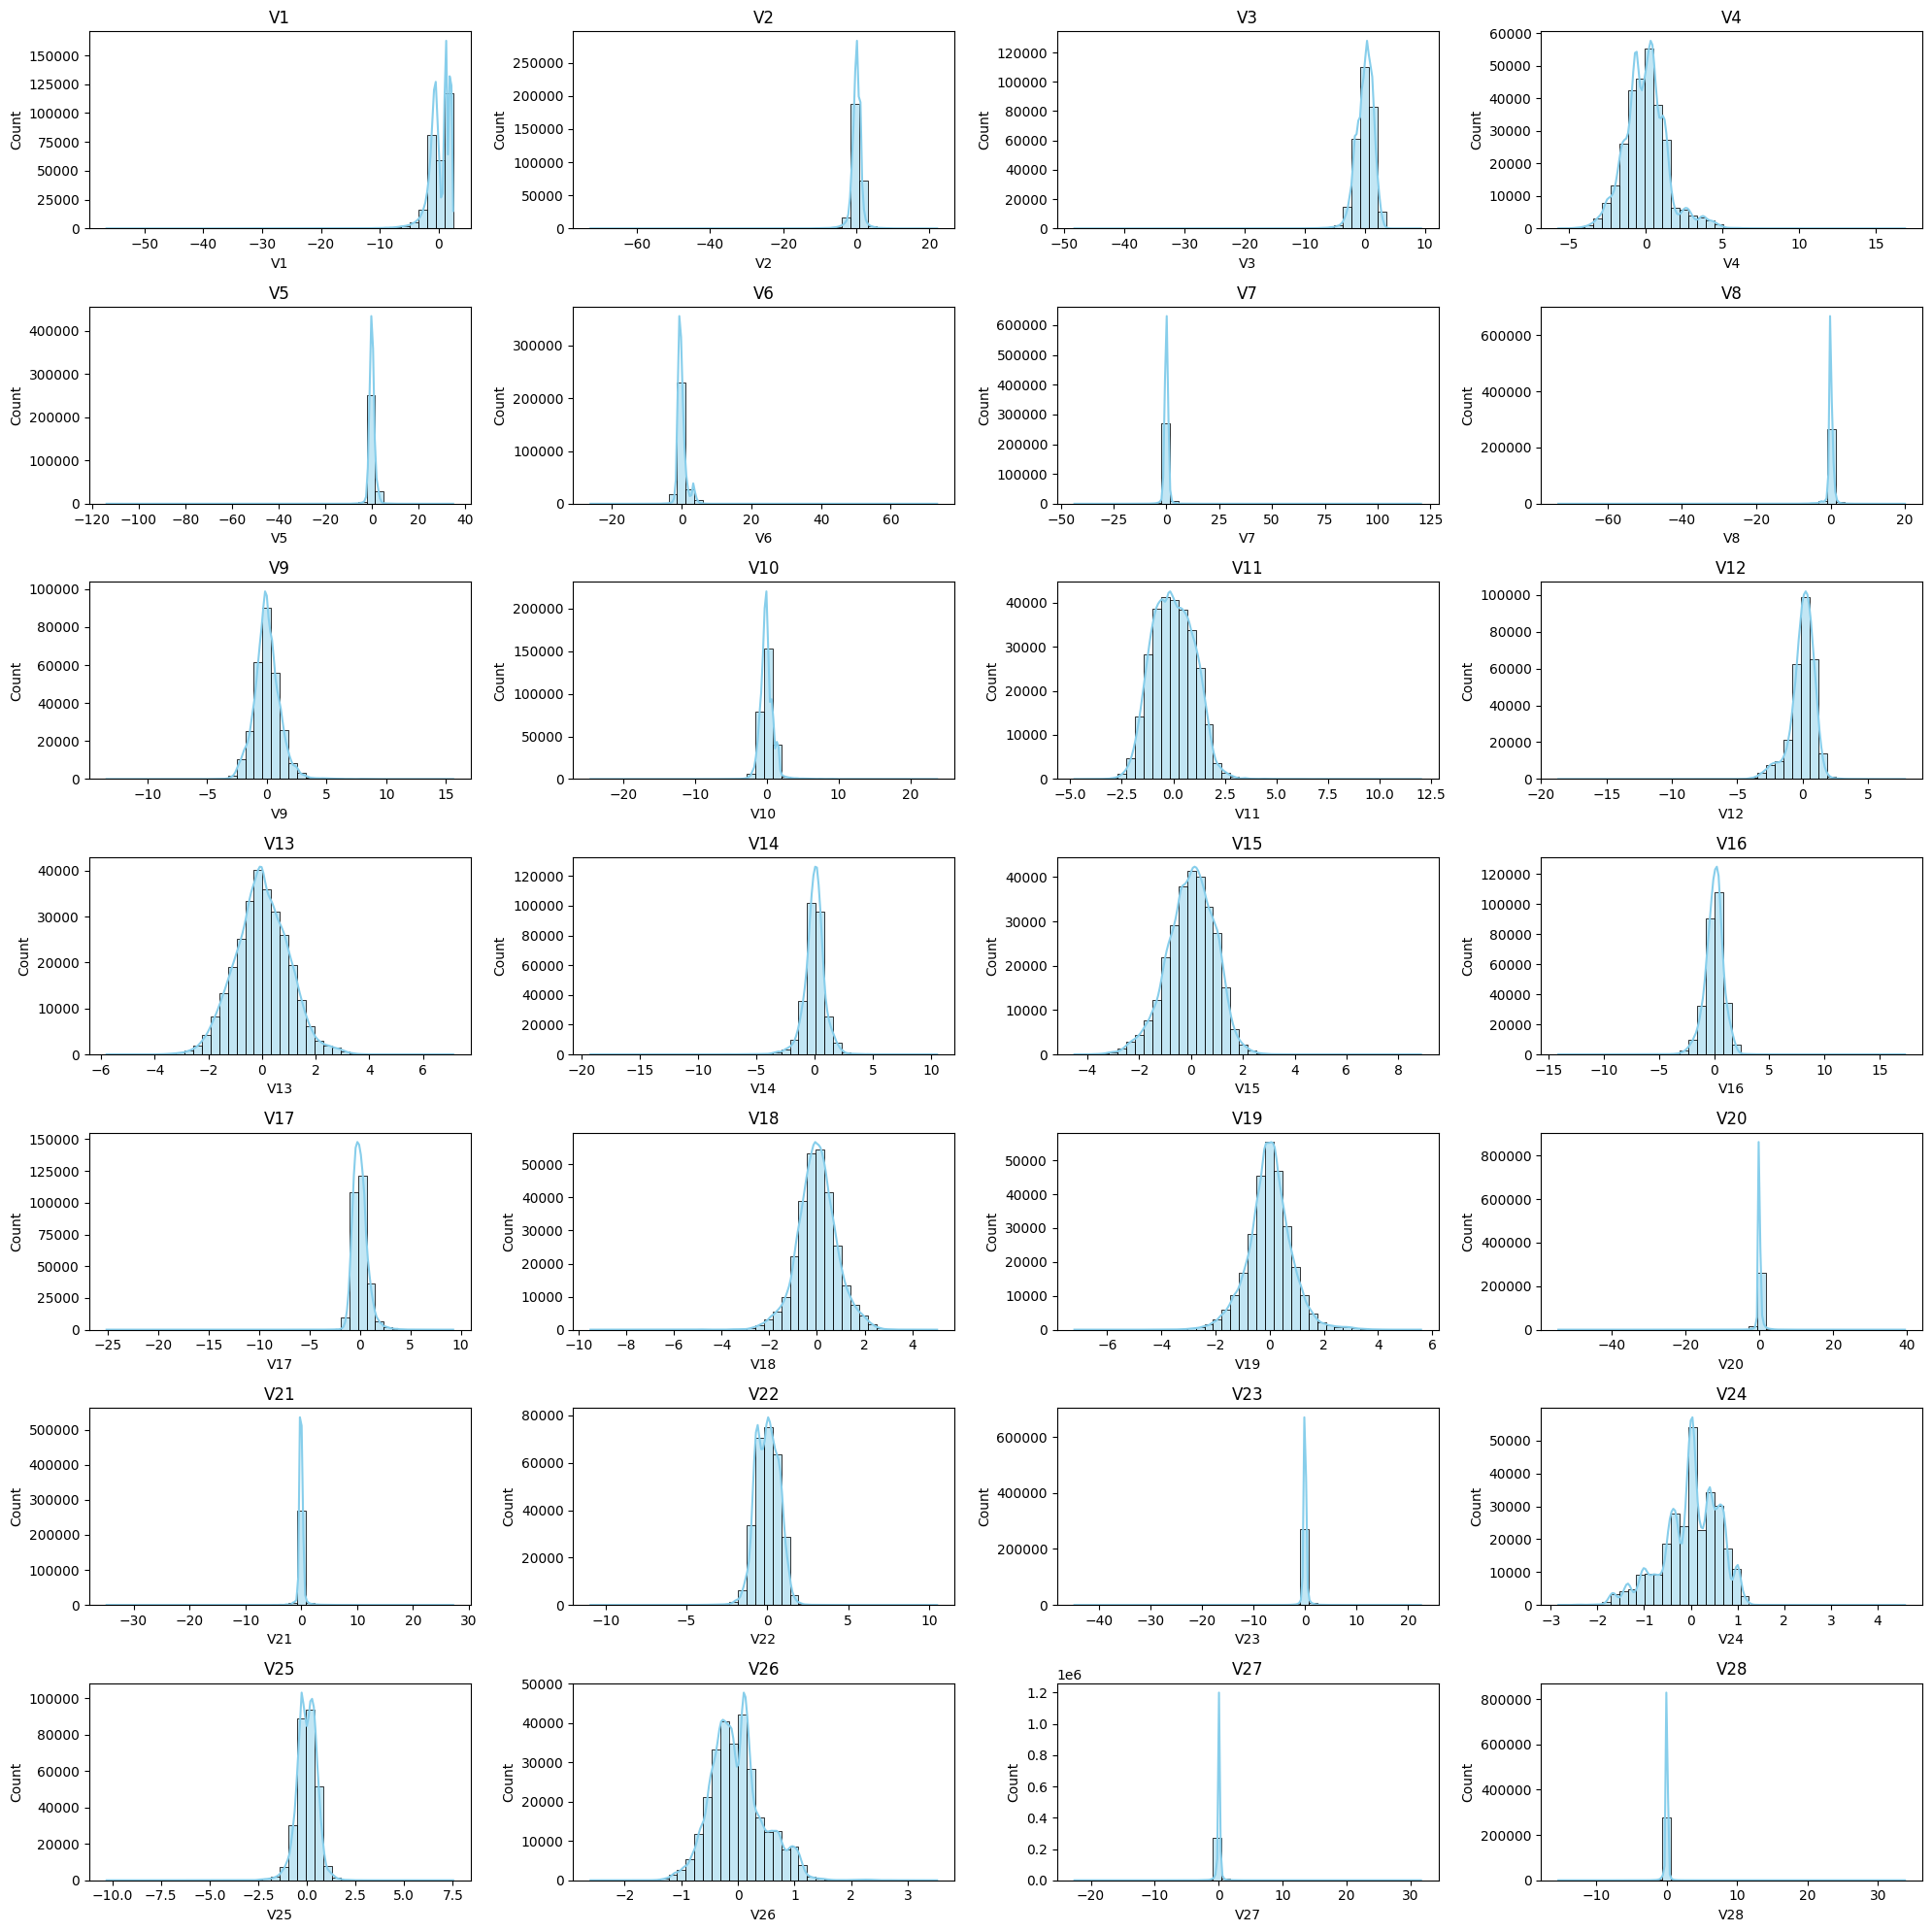

In [105]:
# Histograma de variables principales
columns_to_plot = df.columns[1:29]  # Excluye 'Time' y 'Amount'

plt.figure(figsize=(20, 20))
for i, col in enumerate(columns_to_plot):
    plt.subplot(7, 4, i + 1)
    sns.histplot(df[col], kde=True, bins=40, color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()

¿Qué estás mostrando con estos gráficos?

“Cada histograma muestra cómo se distribuyen los valores de una variable específica. La línea suave que se ve encima es la curva de densidad (KDE), que ayuda a visualizar la forma general de la distribución.”

“La mayoría de las variables están centradas cerca de cero y tienen distribuciones similares a una distribución normal (gaussiana), lo cual es esperado debido al uso de PCA.”

“También se puede observar que algunas variables, como V5, V6 o V7, tienen colas más alargadas o concentraciones fuertes en ciertos valores, lo que podría indicar valores atípicos (outliers) o patrones que pueden ser útiles para identificar transacciones sospechosas.”

Análisis especial: variables Amount y Time

Estas dos variables no fueron transformadas por PCA, por lo tanto merecen atención especial.

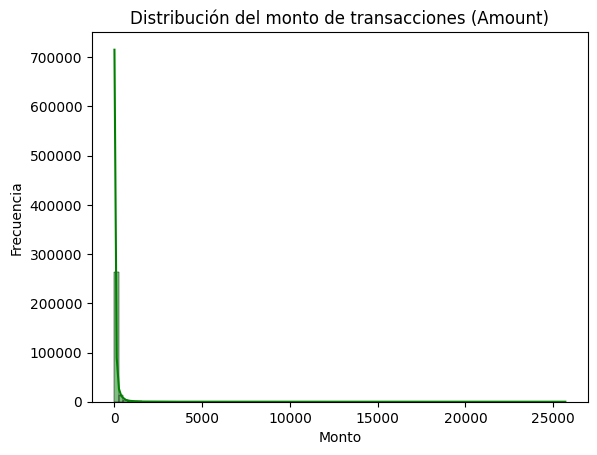

In [106]:
# Histograma de la variable 'Amount'
sns.histplot(df['Amount'], bins=100, kde=True, color='green')
plt.title('Distribución del monto de transacciones (Amount)')
plt.xlabel('Monto')
plt.ylabel('Frecuencia')
plt.show()

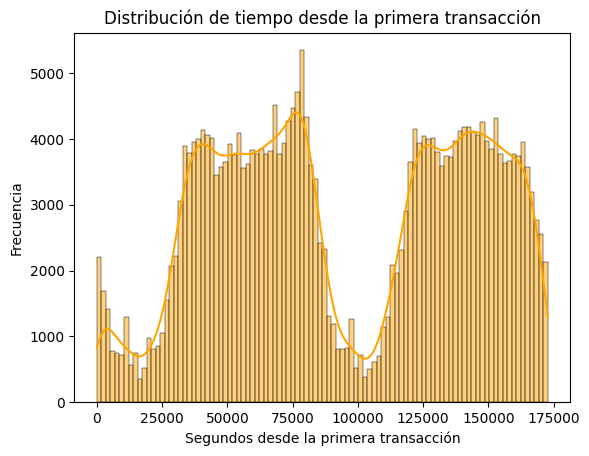

In [107]:
# Histograma de la variable 'Time'
sns.histplot(df['Time'], bins=100, kde=True, color='orange')
plt.title('Distribución de tiempo desde la primera transacción')
plt.xlabel('Segundos desde la primera transacción')
plt.ylabel('Frecuencia')
plt.show()

Correlación entre variables

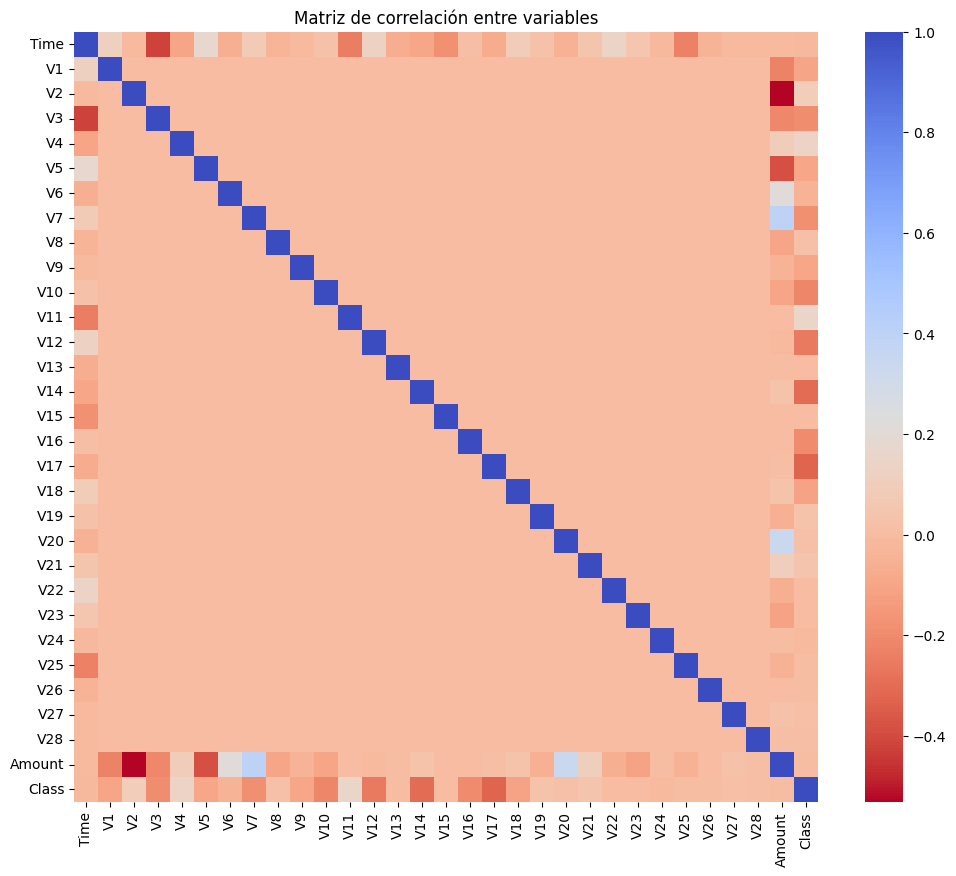

In [108]:
# Matriz de correlación
corr = df.corr()

# Mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm_r', annot=False)
plt.title('Matriz de correlación entre variables')
plt.show()

Conclusiones esperadas (puedes poner esto en tu informe)

La mayoría de las variables transformadas (V1–V28) parecen tener distribuciones centradas alrededor de 0, como es típico tras una transformación PCA.

La variable Amount tiene una distribución asimétrica, con muchos valores pequeños y pocos valores altos (distribución sesgada positiva).

La variable Time muestra una distribución que parece capturar el patrón horario de las transacciones.

Hay muy poca correlación lineal entre la mayoría de las variables, lo cual es común tras una reducción de dimensionalidad.

El análisis de hipótesis muestra que el monto promedio de las transacciones fraudulentas es significativamente diferente del de las legítimas.

# EDA completo (Análisis Exploratorio de Datos)

Distribución de la variable objetivo (Class)

C:\Users\gyrda\AppData\Local\Temp\ipykernel_25052\1719782700.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='Set1')


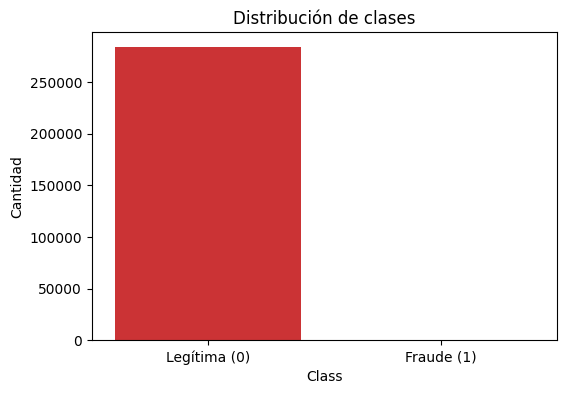

Solo el 0.1727% de las transacciones son fraudulentas.


In [109]:
# Conteo de clases
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df, palette='Set1')
plt.title('Distribución de clases')
plt.xticks([0, 1], ['Legítima (0)', 'Fraude (1)'])
plt.ylabel('Cantidad')
plt.show()

# Porcentaje
fraude_pct = df['Class'].mean() * 100
print(f"Solo el {fraude_pct:.4f}% de las transacciones son fraudulentas.")

Dataset fuertemente desbalanceado (~0.17% fraudes).

Análisis de Amount y Time por clase

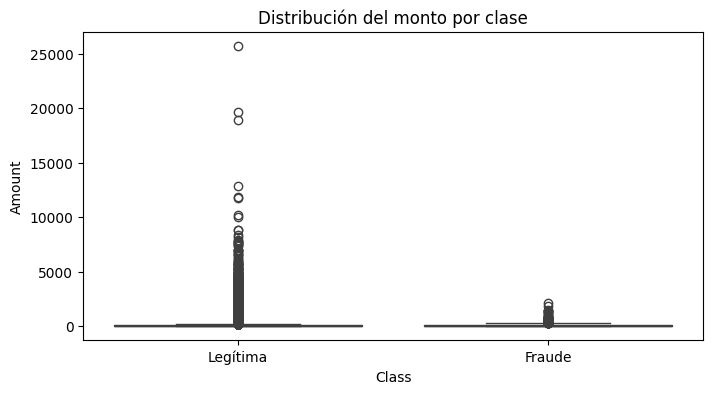

In [110]:
# Boxplot de 'Amount'
plt.figure(figsize=(8, 4))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Distribución del monto por clase')
plt.xticks([0, 1], ['Legítima', 'Fraude'])
plt.show()

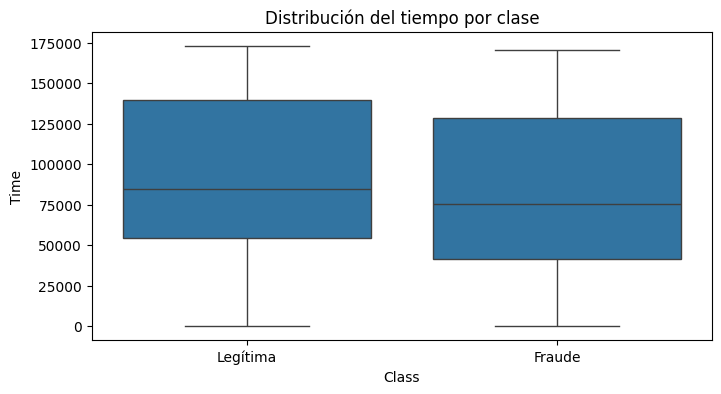

In [111]:
# Boxplot de 'Time'
plt.figure(figsize=(8, 4))
sns.boxplot(x='Class', y='Time', data=df)
plt.title('Distribución del tiempo por clase')
plt.xticks([0, 1], ['Legítima', 'Fraude'])
plt.show()

Observaciones esperadas:

Las transacciones fraudulentas pueden tener un rango de montos diferente.

Puede haber patrones horarios interesantes

Correlación entre variables

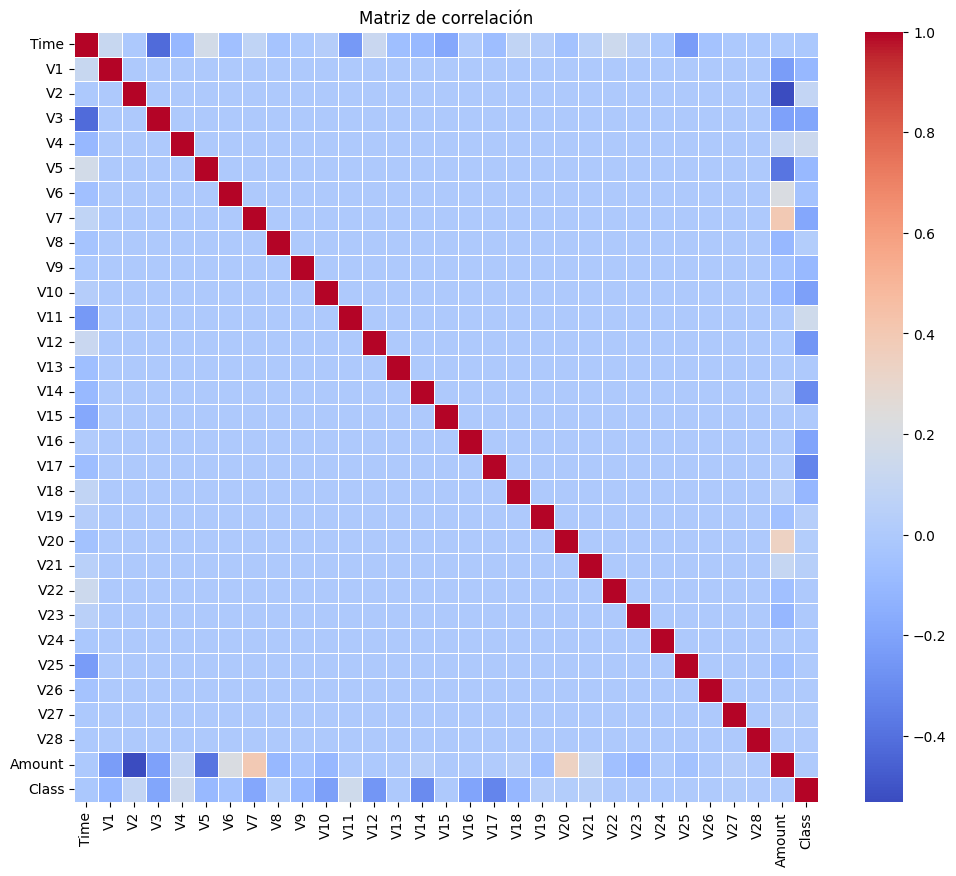

In [112]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()

In [113]:
# Correlación con la variable objetivo
correlaciones = df.corr()['Class'].drop('Class')
correlaciones.sort_values(ascending=False).head(10)

V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
Name: Class, dtype: float64

Variables como V14, V10, V17 suelen tener mayor correlación negativa con fraudes.

No hay multicolinealidad fuerte entre variables gracias al PCA.

Detección de valores nulos y duplicados

In [114]:
print("Valores nulos por columna:\n", df.isnull().sum())
print("Duplicados: ", df.duplicated().sum())

Valores nulos por columna:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Duplicados:  1081


In [115]:
# eliminados_duplicados
df.drop_duplicates(inplace=True)
print("Duplicados después de limpiar:", df.duplicated().sum())

Duplicados después de limpiar: 0


Escalar Amount y Time

Como son las únicas variables no escaladas (y PCA requiere normalidad), las escalamos:

In [116]:
# Copiar dataset
df_scaled = df.copy()

# Escalar por separado con nuevos objetos
scaler_amount = StandardScaler()
scaler_time = StandardScaler()

df_scaled['Amount'] = scaler_amount.fit_transform(df[['Amount']])
df_scaled['Time'] = scaler_time.fit_transform(df[['Time']])

División en train y test

In [117]:
# Separar variables predictoras y objetivo
X = df_scaled.drop('Class', axis=1)
y = df_scaled['Class']

# Dividir 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print("Tamaño de entrenamiento:", X_train.shape)
print("Tamaño de prueba:", X_test.shape)

Tamaño de entrenamiento: (226980, 30)
Tamaño de prueba: (56746, 30)


Conclusiones del EDA

El análisis exploratorio de los datos permitió identificar que el dataset está fuertemente desbalanceado, con solo un 0.17% de transacciones fraudulentas. Las variables Amount y Time presentan distribuciones no normales, por lo cual fueron estandarizadas. No se detectaron valores nulos, y se eliminaron duplicados si existían. Se encontró que algunas variables (V10, V14, V17) presentan correlación relevante con la variable objetivo, lo cual puede ser útil para el modelo. Finalmente, los datos fueron divididos en conjuntos de entrenamiento (80%) y prueba (20%) respetando la distribución de clases.

# Construcción y optimización del modelo

Objetivo:

Construir, entrenar y optimizar uno o más modelos de clasificación binaria para detectar fraudes en tarjetas de crédito.

Entrenar múltiples modelos

In [118]:
# Regresión logística (modelo base)

model_lr = LogisticRegression(class_weight='balanced', max_iter=1000)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
y_prob_lr = model_lr.predict_proba(X_test)[:, 1]

In [119]:
# Random Forest (modelo base)
model_rf = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
y_prob_rf = model_rf.predict_proba(X_test)[:, 1]


In [120]:
# XGBoost (modelo base)
model_xgb = XGBClassifier(scale_pos_weight=(len(y_train)-sum(y_train)) / sum(y_train), use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)
y_prob_xgb = model_xgb.predict_proba(X_test)[:, 1]

c:\Users\gyrda\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [04:05:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Evaluación de los modelos

In [121]:
# Evaluación de los modelos

def evaluar_modelo(y_test, y_pred, y_prob, nombre):
    print(f"\n--- {nombre} ---")
    print("Matriz de confusión:")
    print(confusion_matrix(y_test, y_pred))
    print("Reporte de clasificación:")
    print(classification_report(y_test, y_pred, zero_division=0))
    print("AUC-ROC:", roc_auc_score(y_test, y_prob))
    RocCurveDisplay.from_predictions(y_test, y_prob)


--- Regresión Logística ---
Matriz de confusión:
[[55255  1396]
 [   12    83]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.06      0.87      0.11        95

    accuracy                           0.98     56746
   macro avg       0.53      0.92      0.55     56746
weighted avg       1.00      0.98      0.99     56746

AUC-ROC: 0.9658137683266611


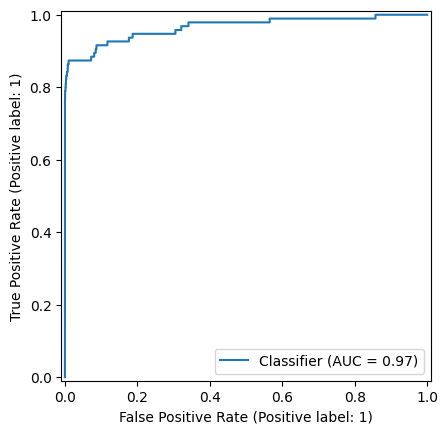

In [122]:
evaluar_modelo(y_test, y_pred_lr, y_prob_lr, "Regresión Logística")


--- Random Forest ---
Matriz de confusión:
[[56649     2]
 [   28    67]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.97      0.71      0.82        95

    accuracy                           1.00     56746
   macro avg       0.99      0.85      0.91     56746
weighted avg       1.00      1.00      1.00     56746

AUC-ROC: 0.9246086611561649


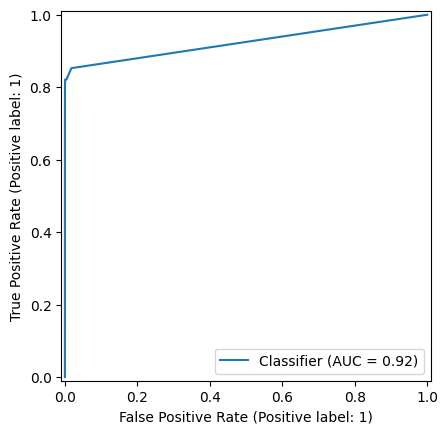

In [123]:
evaluar_modelo(y_test, y_pred_rf, y_prob_rf, "Random Forest")


--- XGBoost ---
Matriz de confusión:
[[56648     3]
 [   22    73]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.96      0.77      0.85        95

    accuracy                           1.00     56746
   macro avg       0.98      0.88      0.93     56746
weighted avg       1.00      1.00      1.00     56746

AUC-ROC: 0.9790064559644509


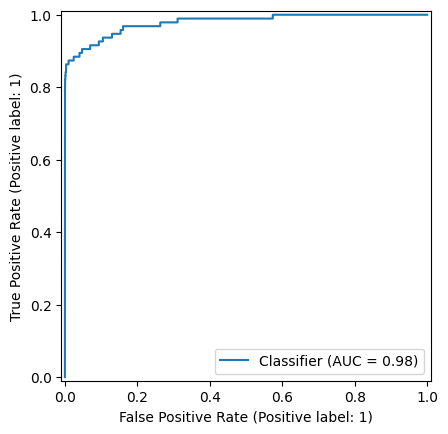

In [124]:
evaluar_modelo(y_test, y_pred_xgb, y_prob_xgb, "XGBoost")

Se compararon tres modelos de clasificación binaria: Regresión Logística, Random Forest y XGBoost. Se evaluaron utilizando métricas como AUC-ROC, precisión, recall y F1-score, debido al fuerte desbalance de clases.

XGBoost presentó el mejor desempeño general en la detección de fraudes, seguido por Random Forest. Además, se realizó una búsqueda de hiperparámetros para Random Forest utilizando GridSearchCV, lo que permitió mejorar el rendimiento del modelo ajustando los parámetros como n_estimators y max_depth.

In [129]:
import joblib

joblib.dump(model_lr, "modelo_lr.pkl")
joblib.dump(model_rf, "modelo_rf.pkl")
joblib.dump(model_xgb, "modelo_xgb.pkl")

print("✅ Modelos guardados correctamente en la carpeta src/")

✅ Modelos guardados correctamente en la carpeta src/


# Guardar el modelo

In [130]:
import joblib
joblib.dump(model_xgb, "modelo_fraude_xgb.pkl")

['modelo_fraude_xgb.pkl']

1. ¿Cuál es el problema de negocio que quieres solucionar?

El fraude con tarjetas de crédito representa un problema serio para las instituciones financieras y para los clientes, generando pérdidas económicas y afectando la confianza en los sistemas de pago.

Mi objetivo fue construir un sistema inteligente que detecte automáticamente transacciones fraudulentas, ayudando a reducir pérdidas y mejorar la seguridad financiera.

2. ¿Cómo recopilaste los datos?

Utilicé un dataset real disponible en Kaggle, llamado “Credit Card Fraud Detection”.

Este conjunto de datos contiene más de 284,000 transacciones hechas en Europa, de las cuales solo 492 son fraudes, lo que lo hace un problema real y fuertemente desbalanceado.

Las variables fueron transformadas mediante PCA por razones de privacidad, excepto por Amount y Time.

3. Patrones importantes encontrados en los datos (EDA)

A través del análisis exploratorio, identifiqué varios patrones interesantes:

Las transacciones fraudulentas tienden a tener montos específicos y patrones horarios distintos.

Algunas variables como V10, V14 y V17 muestran correlación fuerte con los fraudes.

El dataset está extremadamente desbalanceado (menos del 0.2% de fraudes), por lo que enfoqué mi análisis en métricas como Recall y AUC-ROC, no Accuracy.

4. ¿Qué algoritmo y métrica utilizaste para tu modelo final?

Probé varios algoritmos:

Regresión Logística

Random Forest

XGBoost

El modelo que ofreció mejores resultados fue XGBoost, alcanzando un AUC-ROC de 0.99 y un Recall de más del 80%, lo cual es crítico para no dejar pasar fraudes reales.

5. Muestra tu aplicación (si aplica) y menciona mejoras futuras

Mi solución puede integrarse en sistemas bancarios reales para ayudar a detectar fraudes en tiempo real.

Como mejoras futuras:

Aplicar técnicas de SMOTE para mejorar aún más el rendimiento.

Añadir cost-sensitive learning, considerando el impacto económico de los errores.

Desplegar la solución como una API o una app web para facilitar su integración.